In [1]:
import pandas

In [2]:
!pip install scikit-learn

In [4]:
import numpy

In [5]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [9]:
# Load dataset
california = fetch_california_housing()

In [11]:
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

In [13]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
scaler=StandardScaler()

In [15]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression

In [18]:
selector=SelectKBest(score_func=f_regression,k=5)

In [19]:
X_train_selected=selector.fit_transform(X_train_scaled,y_train)
X_test_selected=selector.transform(X_test_scaled)

In [20]:
selected_features=X.columns[selector.get_support()]
print("Selected Features:",selected_features)

Selected Features: Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Latitude'], dtype='object')


In [21]:
# Train model
lr=LinearRegression()
lr.fit(X_train_selected,y_train)

LinearRegression()

In [22]:
# Evaluate
y_pred=lr.predict(X_test_selected)

Linear Regression Results:
MSE: 0.6382565441555915
MAE: 0.5796603458789069
R2: 0.5129333248216975


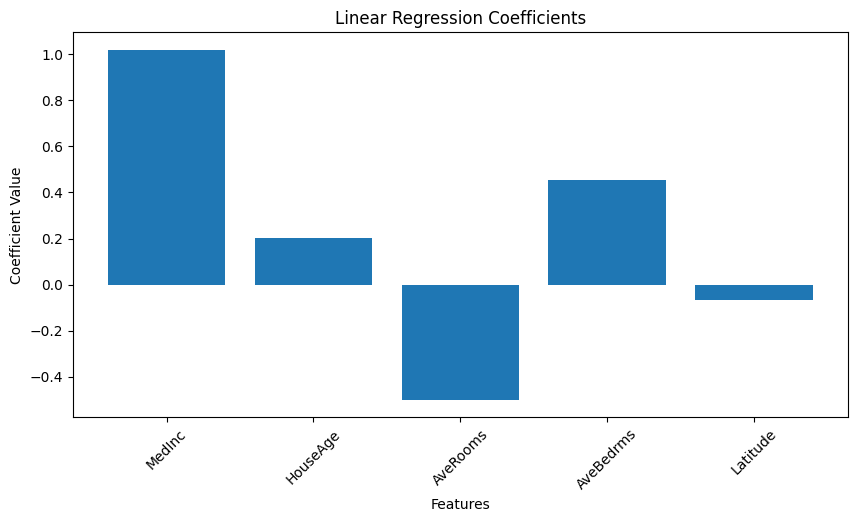

In [24]:
print("Linear Regression Results:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

# Plot coefficients
plt.figure(figsize=(10, 5))
plt.bar(selected_features, lr.coef_)
plt.title("Linear Regression Coefficients")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=45)
plt.show()